<a href="https://colab.research.google.com/github/OthonGustavo/RF_imagem/blob/main/RF_imagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
from PIL import Image
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt


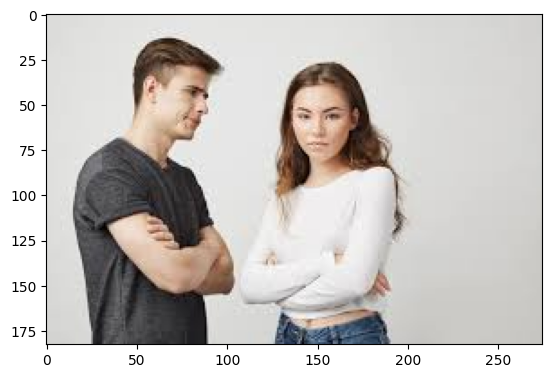

In [3]:
#RF01
image = cv.imread("/content/testeContorno.jpg")
#plt.imshow(image)
#plt.show()

image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)

In [4]:
#RF02
(h,w,c) = image.shape

print("Largura: {} pixels".format(w))
print("Altura: {} pixels".format(h))
print("Canais: {}".format(c))

Largura: 275 pixels
Altura: 183 pixels
Canais: 3


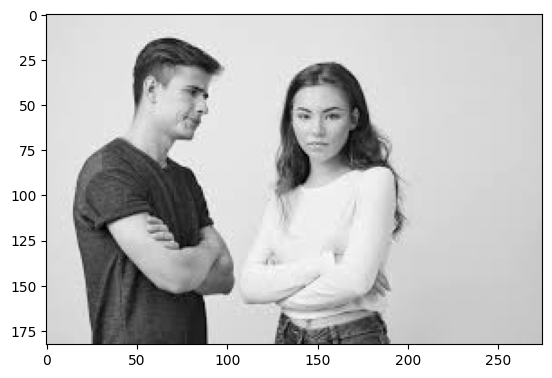

(183, 275)

In [5]:
#RF03
from skimage.color import rgb2gray

img_gray = rgb2gray(image)
plt.imshow(img_gray, cmap = "gray")
plt.show()

img_gray.shape

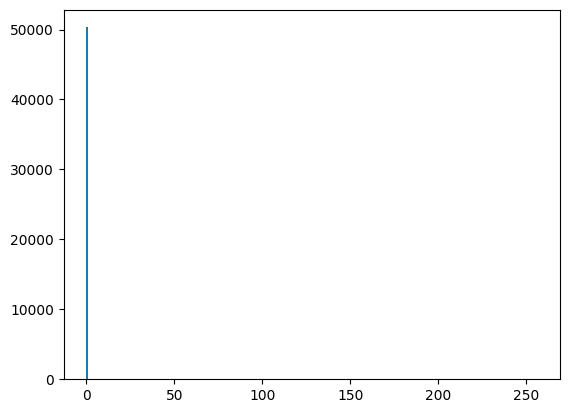

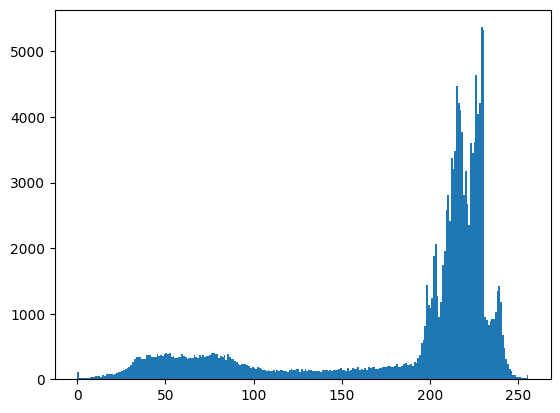

In [6]:
#RF04
plt.hist(img_gray.ravel(), bins = 256, range = [0,256])
plt.show()

plt.hist(image.ravel(), bins = 256, range = [0,256])
plt.show()

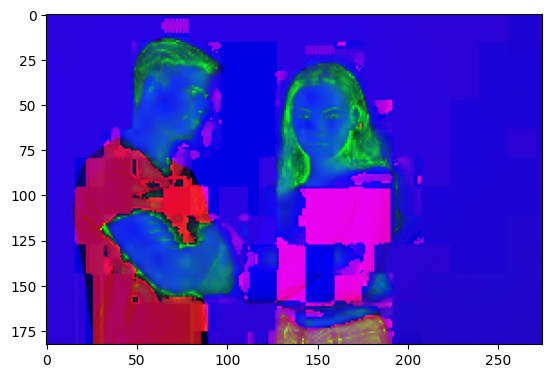

In [7]:
#RF05
from skimage.color import convert_colorspace

img_hsv = convert_colorspace(image, 'RGB', 'HSV')

plt.imshow(img_hsv)
plt.show()

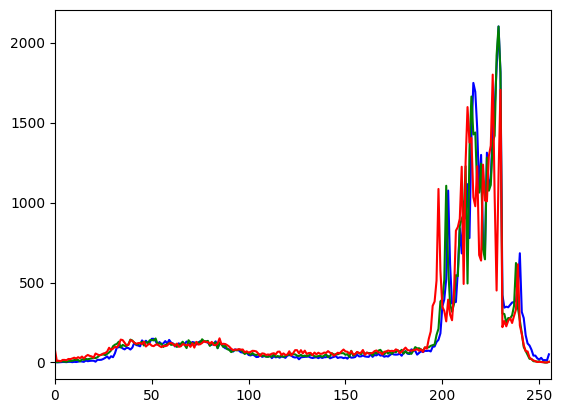

In [8]:
#RF06
color = ('b', 'g', 'r')

#plt.title()

for channel, col in enumerate(color):
  histr = cv.calcHist([image], [channel], None, [256], [0,256])
  plt.plot(histr, color = col)
  plt.xlim([0,256])
plt.show()

In [9]:
def vizinhanca4(linha, coluna):

  v1 = (linha - 1, coluna)
  v2 = (linha, coluna - 1)
  v3 = (linha + 1, coluna)
  v4 = (linha, coluna + 1)

  return [v1,v2,v3,v4]

def vizinhanca8(linha, coluna):

  v5 = (linha - 1, coluna - 1)
  v6 = (linha - 1, coluna + 1)
  v7 = (linha + 1, coluna - 1)
  v8 = (linha + 1, coluna + 1)

  vizinhanca = vizinhanca4(linha,coluna) + [v5,v6,v7,v8]
  return vizinhanca

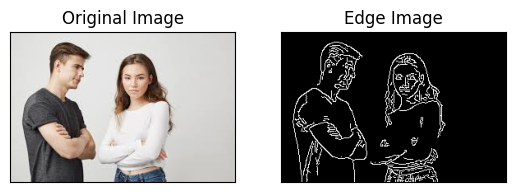

In [10]:
#RF07
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

#img = cv.imread('/content/formasgeometricasBasicas.jpg', cv.IMREAD_GRAYSCALE)
img = image
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [11]:
import numpy as np
import cv2 as cv

im = cv.imread('/content/formasgeometricasBasicas.jpg')
assert im is not None, "file could not be read, check with os.path.exists()"
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)



AssertionError: file could not be read, check with os.path.exists()

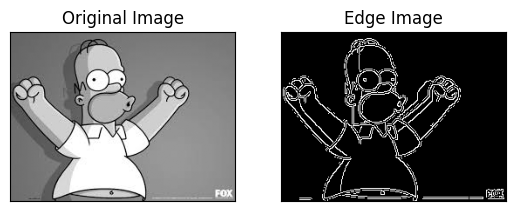

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('/content/teste2.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [37]:
#RF09
import cv2 as cv

tamanho_normalizado = (512, 512)
imagem_normalizada = cv.resize(image, tamanho_normalizado)

print("Dimensões da Imagem Original:", image.shape)
print("Dimensões da Imagem Normalizada:", imagem_normalizada.shape)


Dimensões da Imagem Original: (183, 275, 3)
Dimensões da Imagem Normalizada: (512, 512, 3)


In [38]:
#RF10
from skimage.measure import shannon_entropy

valor_entropia = shannon_entropy(image)

print("Entropia de Shannon da imagem:", valor_entropia)

Entropia de Shannon da imagem: 6.76162180433014


In [35]:
#RF11

import numpy as np
import cv2 as cv

if len(image.shape) > 2:
  imagem_cinza = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
else:
  imagem_cinza = image

valor_variancia = np.var(imagem_cinza)

print("Variância da imagem:", valor_variancia)

Variância da imagem: 3789.536876551793


In [41]:
#RF12

from skimage.feature import graycomatrix, graycoprops
import numpy as np
import cv2 as cv

if len(image.shape) > 2:
  imagem_cinza = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
else:
  imagem_cinza = image

imagem_cinza_uint8 = imagem_cinza.astype(np.uint8)

distancias = [1]
angulos = [0, np.pi/4, np.pi/2, 3*np.pi/4]

glcm = graycomatrix(imagem_cinza_uint8, distances=distancias, angles=angulos, levels=256, symmetric=True, normed=True)

homogeneidade = graycoprops(glcm, 'homogeneity')

print("Homogeneidade (média entre ângulos):", np.mean(homogeneidade))
print("Homogeneidade (por ângulo):", homogeneidade)

Homogeneidade (média entre ângulos): 0.566600452830795
Homogeneidade (por ângulo): [[0.58184193 0.53541051 0.60582599 0.54332338]]
